In [1]:
from google.colab import drive
drive.mount('/content/drive')

!rm -rf /content/sample_data
!sudo cp -r /content/drive/MyDrive/folder/trial/. /content/

Mounted at /content/drive


In [2]:
!sudo rm -R /root/.kaggle
!mkdir kaggle
!mv kaggle .kaggle

!sudo cp /content/drive/MyDrive/folder/kaggle.json /content/.kaggle
!sudo mv /content/.kaggle /root/

rm: cannot remove '/root/.kaggle': No such file or directory


In [56]:
!pip install wget

import pandas as pd
import numpy as np
import importlib

import gru_data_pipeline as gdp
importlib.reload(gdp)

import gru_model as gru
importlib.reload(gru)

import etl
importlib.reload(etl)

<module 'etl' from '/content/etl.py'>

In [61]:
etl.main(is_dataset_new = False, upload = False)

/content/etl.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subjectivity"] = subjectivity
/content/etl.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["subjectivity"] = subjectivity


Starting upload for file london_train.csv


100%|██████████| 193M/193M [00:02<00:00, 75.2MB/s]


Upload successful: london_train.csv (193MB)
Starting upload for file nyc_test.csv


100%|██████████| 27.1M/27.1M [00:00<00:00, 39.7MB/s]


Upload successful: nyc_test.csv (27MB)
Starting upload for file nyc_train.csv


100%|██████████| 108M/108M [00:01<00:00, 68.2MB/s]


Upload successful: nyc_train.csv (108MB)
Skipping folder: .ipynb_checkpoints; use '--dir-mode' to upload folders
Starting upload for file london_test.csv


100%|██████████| 48.1M/48.1M [00:00<00:00, 51.2MB/s]


Upload successful: london_test.csv (48MB)


In [2]:
x_train, x_test, y_train, y_test, embedding_matrix, num_tokens = gdp.main()

./dataset/london_train.csv
./dataset/nyc_test.csv
./dataset/nyc_train.csv
./dataset/london_test.csv


In [9]:
history, model = gru.main(x_train, y_train.values.reshape((-1,1)), embedding_matrix, num_tokens)

Epoch 1/2000
60/60 [==============================] - 3s 18ms/step - loss: 0.6651 - accuracy: 0.5624 - val_loss: 0.6438 - val_accuracy: 0.5941
Epoch 2/2000
60/60 [==============================] - 1s 10ms/step - loss: 0.6510 - accuracy: 0.5843 - val_loss: 0.6468 - val_accuracy: 0.5920
Epoch 3/2000
60/60 [==============================] - 1s 10ms/step - loss: 0.6140 - accuracy: 0.6667 - val_loss: 0.5823 - val_accuracy: 0.7206
Epoch 4/2000
60/60 [==============================] - 1s 10ms/step - loss: 0.4519 - accuracy: 0.8171 - val_loss: 0.4433 - val_accuracy: 0.8440
Epoch 5/2000
60/60 [==============================] - 1s 12ms/step - loss: 0.4059 - accuracy: 0.8488 - val_loss: 0.3126 - val_accuracy: 0.8840
Epoch 6/2000
60/60 [==============================] - 1s 10ms/step - loss: 0.3811 - accuracy: 0.8634 - val_loss: 0.3486 - val_accuracy: 0.8898
Epoch 7/2000
60/60 [==============================] - 1s 9ms/step - loss: 0.3214 - accuracy: 0.8846 - val_loss: 0.2601 - val_accuracy: 0.8998


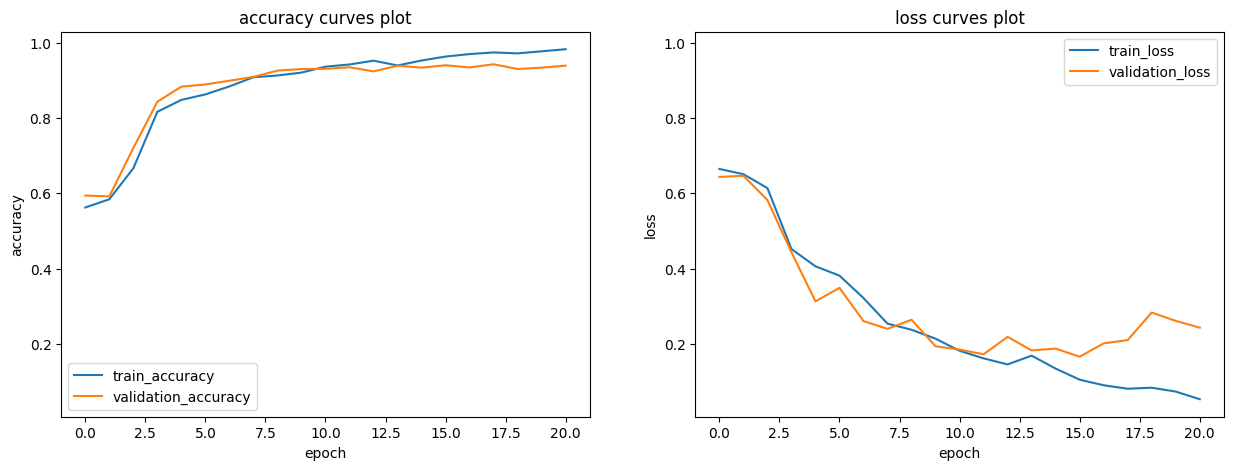

In [10]:
gru.show_learning_curves(history)

In [11]:
model.evaluate(x_test, y_test.values.reshape((-1,1)))

3417/3417 [==============================] - 12s 4ms/step - loss: 0.2989 - accuracy: 0.9252


[0.29892292618751526, 0.9252156019210815]

3417/3417 [==============================] - 10s 3ms/step


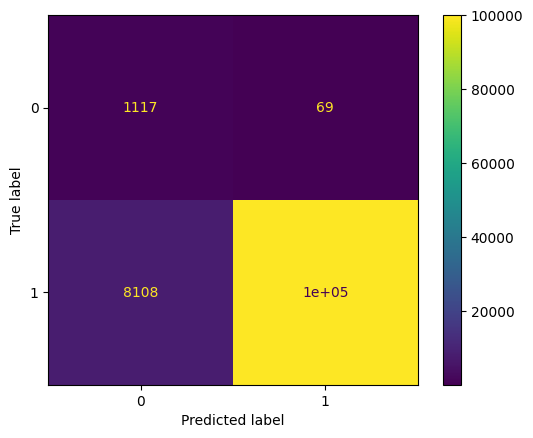

In [55]:
gru.plot_confusion(np.round(model.predict(x_test)), y_test)

297/297 [==============================] - 1s 3ms/step


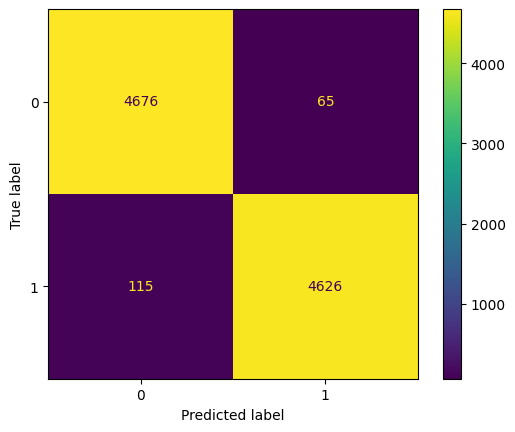

In [54]:
gru.plot_confusion(np.round(model.predict(x_train)), y_train)